<a href="https://colab.research.google.com/github/aradhanam15/HR-Attrition-Dashboard/blob/main/Copy_of_Resignation_Risk_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/content/HR Analytics Employee Attrition.csv"
df = pd.read_csv(file_path)

# Show first few rows and basic info
print("✅ Dataset Loaded. Shape:", df.shape)
df.head()



✅ Dataset Loaded. Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# noe checking the informations
# Check for attrition distribution
print("Attrition Value Counts:\n", df['Attrition'].value_counts())

# Missing values
print("\nMissing values:\n", df.isnull().sum())


Attrition Value Counts:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear      

/tmp/ipython-input-4-4287387770.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="Set2")


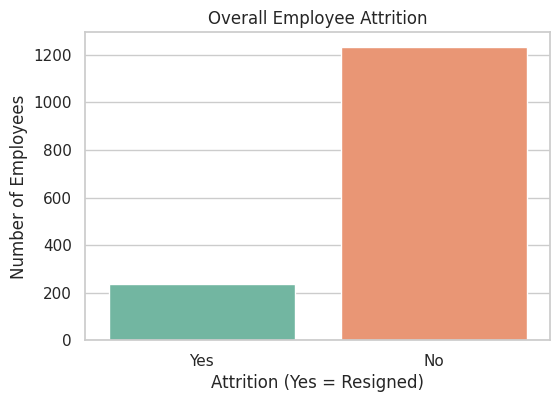

In [ ]:
#Visual Exploratory Data Analysis
#Visualize Key Insights



#1. Attrition Count Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition", palette="Set2")
plt.title("Overall Employee Attrition")
plt.xlabel("Attrition (Yes = Resigned)")
plt.ylabel("Number of Employees")
plt.show()





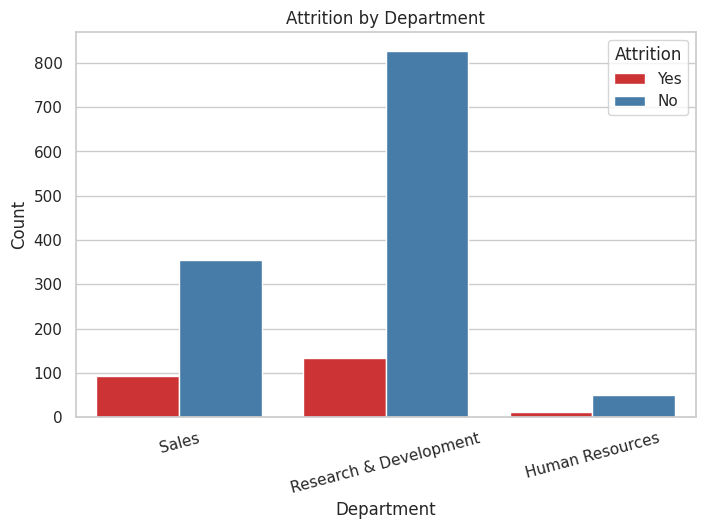

In [ ]:
#Attrition by Department
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set1")
plt.title("Attrition by Department")
plt.xticks(rotation=15)
plt.ylabel("Count")
plt.show()


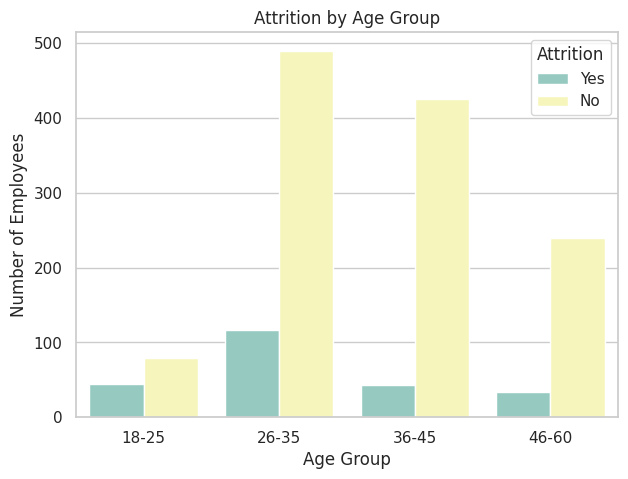

In [ ]:
#Attrition by Age Group
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 60],
                        labels=['18-25', '26-35', '36-45', '46-60'])

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="AgeGroup", hue="Attrition", palette="Set3")
plt.title("Attrition by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.show()


/tmp/ipython-input-8-1119327542.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="coolwarm")


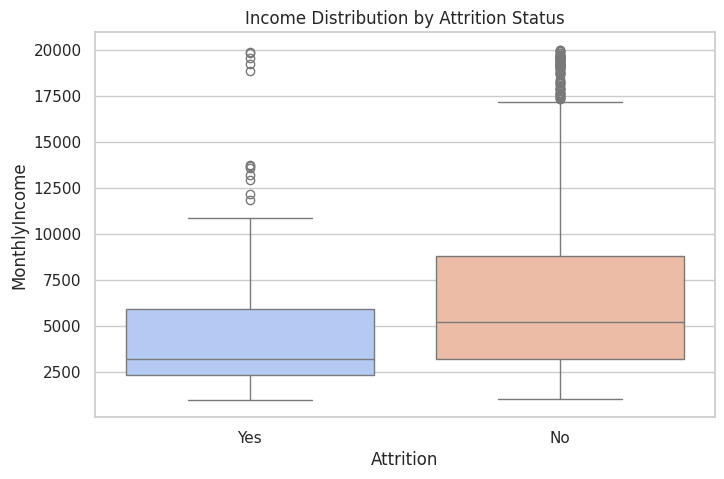

In [ ]:
#Attrition by Monthly Income
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="coolwarm")
plt.title("Income Distribution by Attrition Status")
plt.show()


In [ ]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert target column to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Step 2: Drop columns that won't help (like EmployeeNumber, Over18)
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Step 3: Encode all categorical variables
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Define X (features) and y (target)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Sample X_train row:\n", X_train.iloc[0])
print("Sample y_train:", y_train.iloc[0])


X_train shape: (1176, 31)
y_train shape: (1176,)
Sample X_train row:
 Age                            24
BusinessTravel                  2
DailyRate                     350
Department                      1
DistanceFromHome               21
Education                       2
EducationField                  5
EnvironmentSatisfaction         3
Gender                          1
HourlyRate                     57
JobInvolvement                  2
JobLevel                        1
JobRole                         2
JobSatisfaction                 1
MaritalStatus                   0
MonthlyIncome                2296
MonthlyRate                 10036
NumCompaniesWorked              0
OverTime                        0
PercentSalaryHike              14
PerformanceRating               3
RelationshipSatisfaction        2
StockOptionLevel                3
TotalWorkingYears               2
TrainingTimesLastYear           3
WorkLifeBalance                 3
YearsAtCompany                  1
YearsInCurre

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Data types in X_train:\n", X_train.dtypes)


X_train shape: (1176, 31)
y_train shape: (1176,)
Missing values in X_train: 0
Missing values in y_train: 0
Data types in X_train:
 Age                            int64
BusinessTravel                 int64
DailyRate                      int64
Department                     int64
DistanceFromHome               int64
Education                      int64
EducationField                 int64
EnvironmentSatisfaction        int64
Gender                         int64
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                        int64
JobSatisfaction                int64
MaritalStatus                  int64
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                       int64
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("/content/HR Analytics Employee Attrition.csv")

# Convert Attrition to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop irrelevant columns if they exist
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8809523809523809

📊 Confusion Matrix:
 [[254   1]
 [ 34   5]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



/tmp/ipython-input-19-1175788233.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette="viridis")


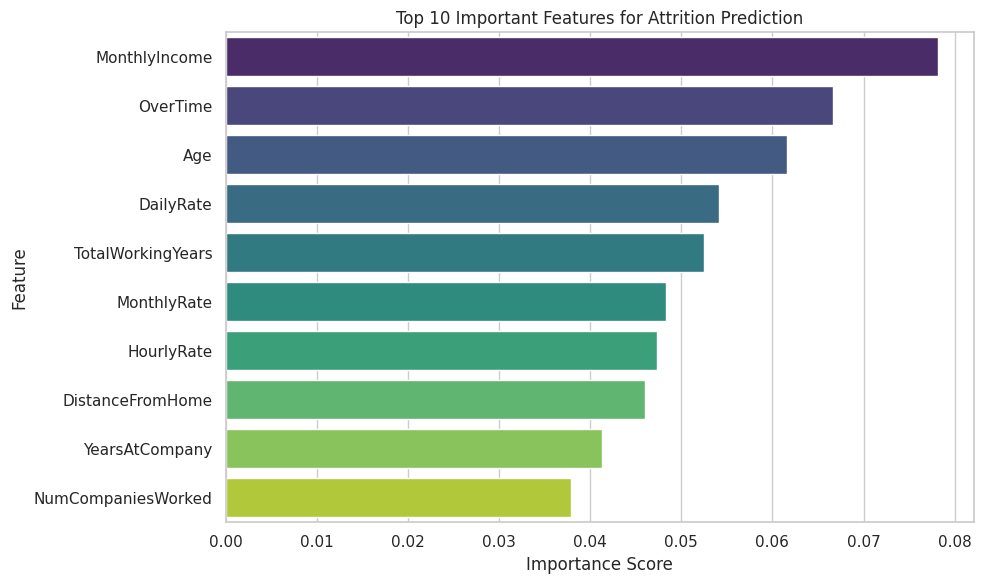

In [ ]:
 #Feature Importance — What Makes People Resign
 import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette="viridis")
plt.title("Top 10 Important Features for Attrition Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
